-------------------------

### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---------------

### Load Compustat data

In [2]:
df= pd.read_csv("data/compustat_from_1990.csv")
df=df[['conm', 'gvkey', 'fyear']]
df=df[df['fyear']>=2010]
print(df.shape)
df.head()

(61008, 3)


,conm,gvkey,fyear
20,AAR CORP,1004,2010
21,AAR CORP,1004,2011
22,AAR CORP,1004,2012
23,AAR CORP,1004,2013
24,AAR CORP,1004,2014


### Visualize the imbalanced panel.

<AxesSubplot:xlabel='fyear'>

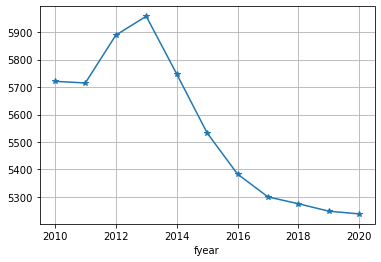

In [3]:
df.groupby('fyear').count()['gvkey'].plot(kind='line', grid= True, marker= '*')

In [4]:
df_N= df.groupby('gvkey').agg('count').rename(columns={'fyear':'N'}).reset_index()
df_N.head()

,gvkey,conm,N
0,1004,11,11
1,1013,1,1
2,1045,11,11
3,1050,11,11
4,1072,9,9


In [5]:
gvkey_list= list(df_N[df_N.N== max(df_N.N)].gvkey)
len(gvkey_list)

2694

In [6]:
df= df[df.gvkey.isin(gvkey_list)]
print(df.shape)
df.head()

(29634, 3)


,conm,gvkey,fyear
20,AAR CORP,1004,2010
21,AAR CORP,1004,2011
22,AAR CORP,1004,2012
23,AAR CORP,1004,2013
24,AAR CORP,1004,2014


--------------

### Check whether balance is achieved.

### 1) Visualization

Unique firms:  2694


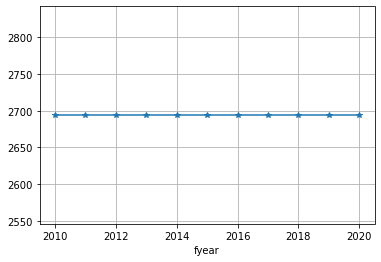

In [7]:
df.groupby('fyear').count()['gvkey'].plot(kind='line', grid= True, marker= '*')
print("Unique firms: ",len(df.gvkey.unique()))
plt.show()

### 2) Calculation of # (years) * # (unique firms) = # (firm-years)

In [8]:
A= df.shape[0]
B= len(df.gvkey.unique())
C= len(df.fyear.unique())
print(f"A: # of firm-year: {A}")
print(f"B: # of unique firms: {B}")
print(f"C: # of years: {C}")
print("-"*50)
print(f"Check of A= B*C: {A}= {B}*{C}= {B*C}")

A: # of firm-year: 29634
B: # of unique firms: 2694
C: # of years: 11
--------------------------------------------------
Check of A= B*C: 29634= 2694*11= 29634


---------------